In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("james_bond_data_cleaned.csv").convert_dtypes()
data.head()

,release_date,movie_title,bond_actor,car_manufacturer,income_usa,income_world,movie_budget,film_length,imdb,rotten_tomatoes,martinis_consumed,bond_kills,release_year
0,1962-06-01,Dr. No,Sean Connery,Sunbeam,1606703500,5956703500,100000000,110,7.3,7.7,2,4,1962
1,1963-08-01,From Russia with Love,Sean Connery,Bentley,2480000000,7890000000,200000000,115,7.5,8.0,0,11,1963
2,1964-05-01,Goldfinger,Sean Connery,Aston Martin,5110000000,12490000000,300000000,110,7.8,8.4,1,9,1964
3,1965-09-01,Thunderball,Sean Connery,Aston Martin,6360000000,14120000000,900000000,130,7.0,6.8,0,20,1965
4,1967-11-01,You Only Live Twice,Sean Connery,Toyota,4310000000,11160000000,950000000,117,6.9,6.3,1,21,1967


In [3]:
IMDB = np.array(data['imdb'].tolist())
RT = np.array(data['rotten_tomatoes'].tolist())
print(len(IMDB))

25


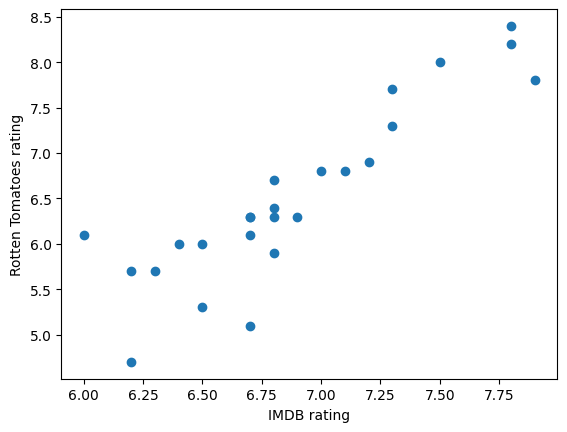

In [4]:
plt.scatter(IMDB, RT)
plt.xlabel('IMDB rating')
plt.ylabel('Rotten Tomatoes rating')
plt.show()

In [5]:
x = data.loc[:, ['imdb']]
y = data.loc[:, 'rotten_tomatoes']

In [6]:
model = LinearRegression()
model.fit(x, y)

r_squared = f"R-Squared: {model.score(x, y):.2f}"
best_fit = f"y = {model.coef_[0]:.4f}x{model.intercept_:+.4f}"
y_pred = model.predict(x)

In [14]:
print(r_squared)

R-Squared: 0.79


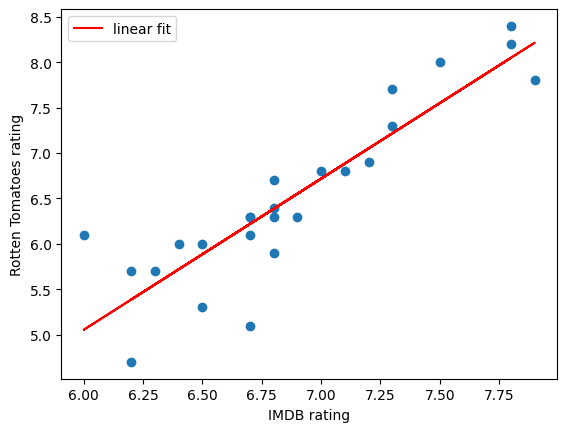

In [7]:
def fit(x):
    return model.coef_[0] * x + model.intercept_

YFIT = fit(IMDB)

plt.scatter(IMDB, RT)
plt.plot(IMDB, YFIT, color='red', label='linear fit')
plt.xlabel('IMDB rating')
plt.ylabel('Rotten Tomatoes rating')
plt.legend()
plt.show()

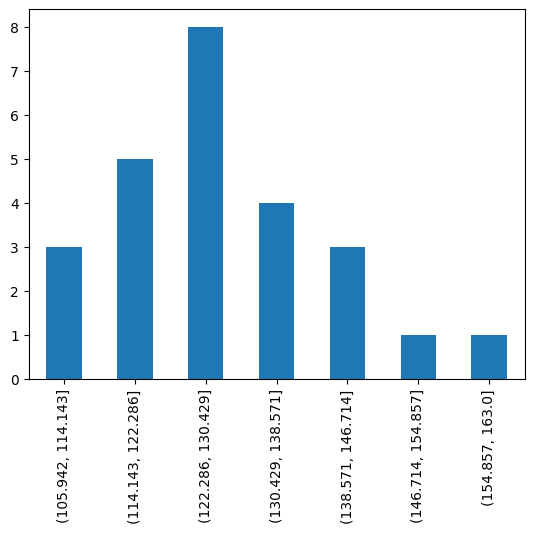

In [8]:
data['film_length'].value_counts(bins=7).sort_index().plot(kind='bar')
plt.show()

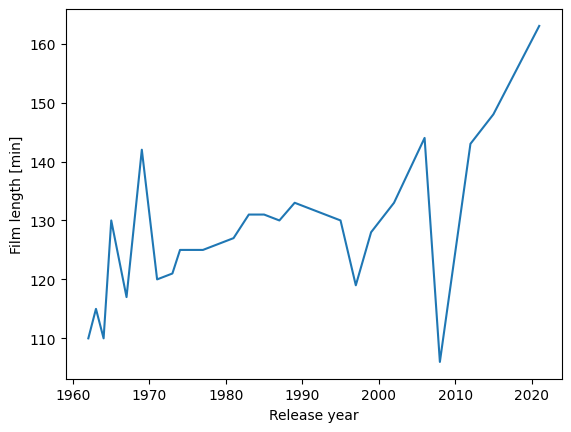

In [9]:
plt.plot(data['release_year'], data['film_length'])
plt.xlabel('Release year')
plt.ylabel('Film length [min]')
plt.show()

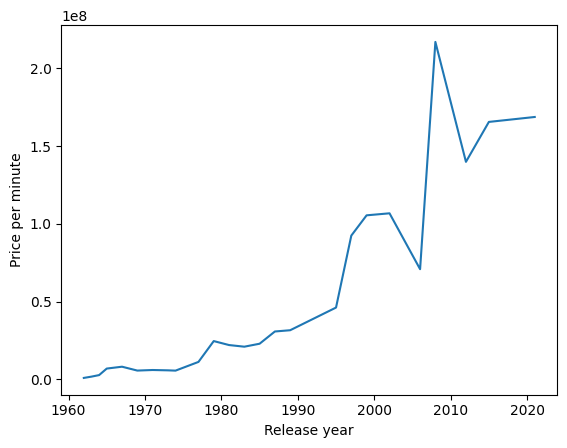

In [10]:
plt.plot(data['release_year'], data['movie_budget']/data['film_length'])
plt.xlabel('Release year')
plt.ylabel('Price per minute')
plt.show()

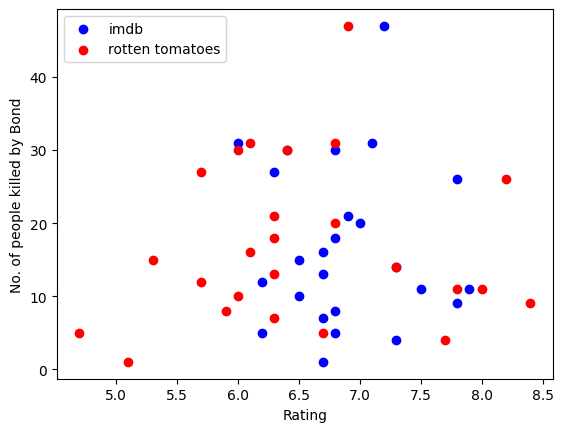

In [11]:
plt.scatter(data['imdb'], data['bond_kills'], color='blue', label='imdb')
plt.scatter(data['rotten_tomatoes'], data['bond_kills'], color='red', label='rotten tomatoes')
plt.xlabel('Rating')
plt.ylabel('No. of people killed by Bond')
plt.legend()
plt.show()

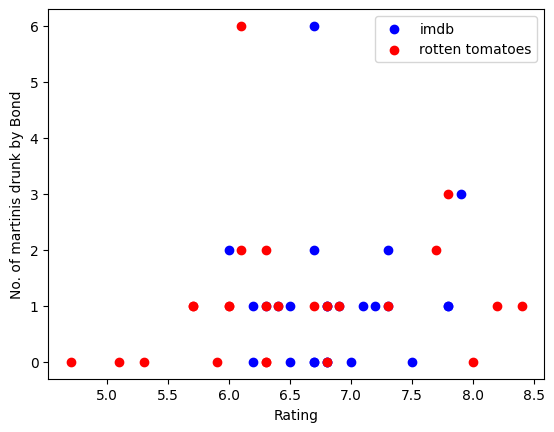

In [12]:
plt.scatter(data['imdb'], data['martinis_consumed'], color='blue', label='imdb')
plt.scatter(data['rotten_tomatoes'], data['martinis_consumed'], color='red', label='rotten tomatoes')
plt.xlabel('Rating')
plt.ylabel('No. of martinis drunk by Bond')
plt.legend()
plt.show()

In [13]:
SET = []
for actor in data['bond_actor']:
    SET.append(f"{actor}: ") + str(data.loc[data['bond_actor'] == f"{actor}", 'imdb'].median()))

SET_UNIQUE = set(SET)
print(SET_UNIQUE)

SyntaxError: unmatched ')' (3705430532.py, line 3)

In [ ]:
SET = []
for actor in data['bond_actor']:
    SET.append(f"{actor}: " + str(data.loc[data['bond_actor'] == f"{actor}", 'rotten_tomatoes'].median()))

SET_UNIQUE = set(SET)
print(SET_UNIQUE)

In [ ]:
data['movie_title'].unique()